# Ανάλυση Προτύπων 

Εργαστήριο 2

In [159]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import librosa
import numpy as np
from scipy.fftpack import dct, idct

import lib
import importlib

In [160]:
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab2/lib.py'>

### Βήμα 2

In [117]:
fs = 16000 # sampling rate 

In [118]:
wavs, speakers, digits = lib.data_parser("digits/")

### Βήμα 3

In [119]:
hop_time = 0.010 # 10ms
window_time = 0.025 # 25ms

hop_samples = int(hop_time * fs)
window_samples = int(window_time * fs)

In [161]:
mfcc_list = []
for wav in wavs:
    mfcc_list.append(lib.calc_mfcc(wav, hop_samples, window_samples))

In [162]:
# Default axis = -1 chooses columns

deltas = [librosa.feature.delta(mfcc) for mfcc in mfcc_list]
delta_deltas = [librosa.feature.delta(mfcc, order=2) for mfcc in mfcc_list]

### Βήμα 4

In [122]:
n1 = 'six' # 03117169
n2 = 'nine' # 03117089

In [123]:
n1_mfcc_list = [mfcc for mfcc, digit in zip(mfcc_list, digits) if digit == n1]
n2_mfcc_list = [mfcc for mfcc, digit in zip(mfcc_list, digits) if digit == n2]

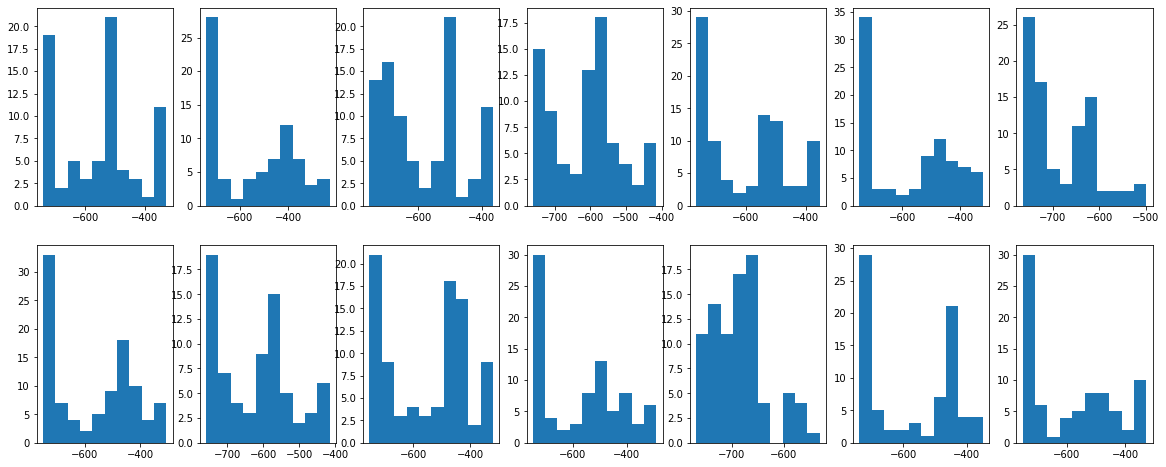

In [124]:
n1_first_feature = [mfcc[0] for mfcc in n1_mfcc_list]

n1_size = len(n1_mfcc_list)
rows = 2
cols = int(n1_size / rows)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8))
axs = axs.flatten()
for x, ax in zip(n1_first_feature, axs):
    ax.hist(x)

plt.show()

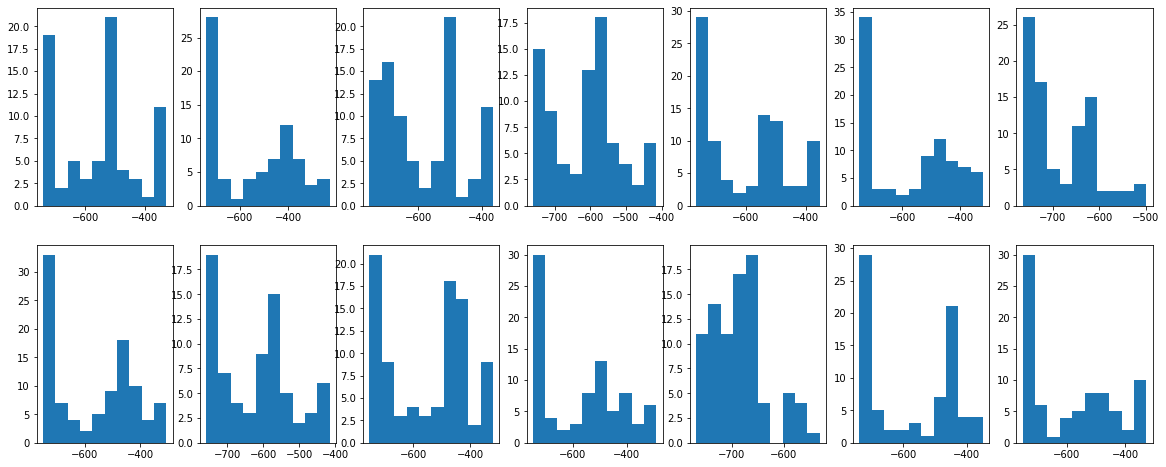

In [125]:
n1_second_feature = [mfcc[1] for mfcc in n1_mfcc_list]

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8))
axs = axs.flatten()
for x, ax in zip(n1_first_feature, axs):
    ax.hist(x)

plt.show()

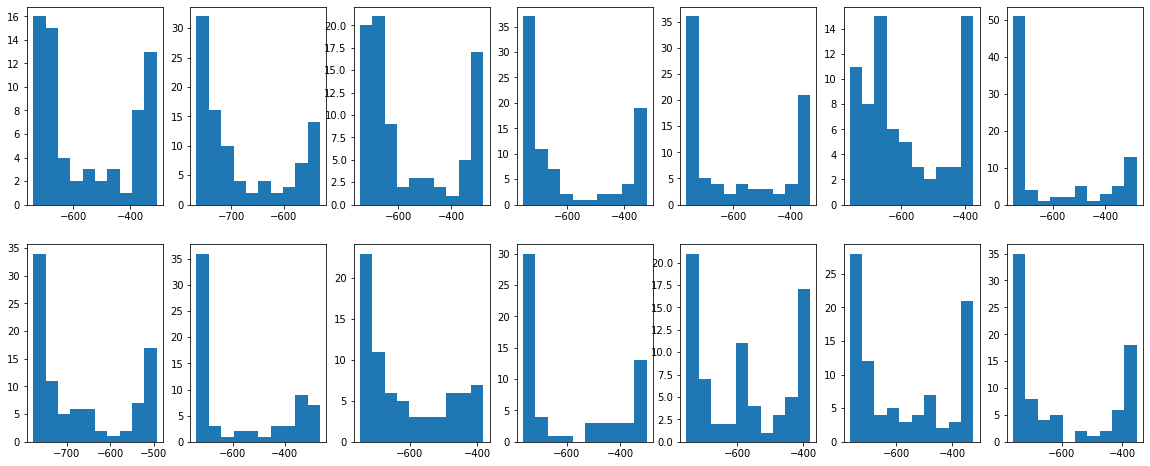

In [126]:
n2_first_feature = [mfcc[0] for mfcc in n2_mfcc_list]

n2_size = len(n2_mfcc_list)
rows = 2
cols = int(n2_size / rows)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8))
axs = axs.flatten()
for x, ax in zip(n2_first_feature, axs):
    ax.hist(x)

plt.show()

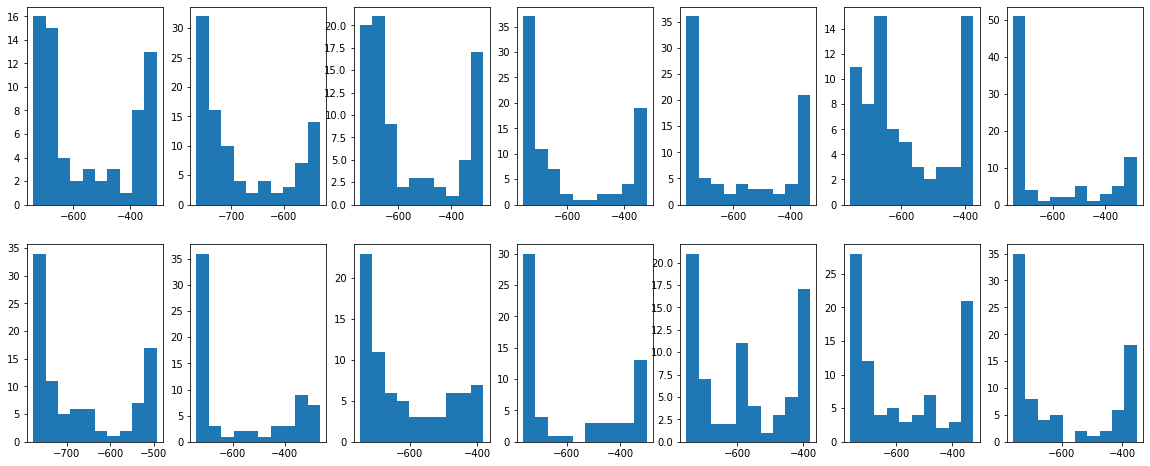

In [127]:
n2_second_feature = [mfcc[1] for mfcc in n2_mfcc_list]

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8))
axs = axs.flatten()
for x, ax in zip(n2_first_feature, axs):
    ax.hist(x)

plt.show()

In [157]:
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab2/lib.py'>

In [165]:
# Find six1, six2, nine1, nine2
n1_indices = [lib.choose_index(n1, '1', digits, speakers), lib.choose_index(n1, '2', digits, speakers)]
n2_indices = [lib.choose_index(n2, '1', digits, speakers), lib.choose_index(n2, '2', digits, speakers)]

n1_mfscs = []
for i in n1_indices:
    mfcc = lib.calc_mfcc(wavs[i], hop_samples, window_samples)
    n1_mfscs.append(idct(mfcc))

n2_mfscs = []
for i in n2_indices:
    mfcc = lib.calc_mfcc(wavs[i], hop_samples, window_samples)
    n2_mfscs.append(idct(mfcc))


### Βήμα 5

In [208]:
# Transform digits to list of integers
digits_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}
digits_int = [digits_dict[digit] for digit in digits]

# Transform speakers to list of integers from 1 to 15
speakers_dict = {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '11':11, '12':12, '13':13, '14':14, '15':15}
speakers_int = [speakers_dict[speaker] for speaker in speakers]

In [218]:
data_mean = [np.array([mfcc.mean(axis=1), delta.mean(axis=1), delta2.mean(axis=1)]).ravel() for mfcc, delta, delta2 in zip(mfcc_list, deltas, delta_deltas)]
data_mean = np.array(data_mean)
print(data_mean.shape)

data_std = [np.array([mfcc.std(axis=1), delta.std(axis=1), delta2.std(axis=1)]).ravel() for mfcc, delta, delta2 in zip(mfcc_list, deltas, delta_deltas)]
data_std = np.array(data_std)
print(data_std.shape)

(133, 39)
(133, 39)


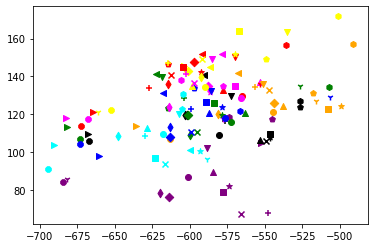

In [219]:
# Assign a color to numbers from 1 to 9
color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'orange', 6: 'purple', 7: 'black', 8: 'cyan', 9: 'magenta'}

# Assign a marker to numbers from 1 to 15
marker_dict = {1: 'o', 2: '^', 3: 's', 4: '*', 5: '+', 6: 'x', 7: 'D', 8: 'd', 9: 'h', 10: 'p', 11: 'v', 12: '<', 13: '>', 14: '8', 15: '1'}

for d, s, m in zip(digits_int, speakers_int, data_mean):
    plt.scatter([m[0]], [m[1]], c=color_dict[d], marker=marker_dict[s])

plt.show()

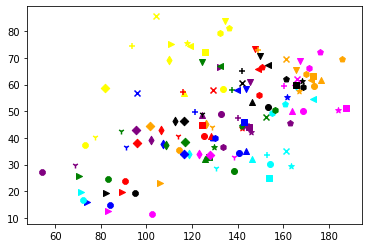

In [220]:
# Assign a color to numbers from 1 to 9
color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'orange', 6: 'purple', 7: 'black', 8: 'cyan', 9: 'magenta'}

# Assign a marker to numbers from 1 to 15
marker_dict = {1: 'o', 2: '^', 3: 's', 4: '*', 5: '+', 6: 'x', 7: 'D', 8: 'd', 9: 'h', 10: 'p', 11: 'v', 12: '<', 13: '>', 14: '8', 15: '1'}

for d, s, m in zip(digits_int, speakers_int, data_std):
    plt.scatter([m[0]], [m[1]], c=color_dict[d], marker=marker_dict[s])

### Βήμα 6